In [1]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

In [7]:
df = df[['Order Date', 'Sales']]
df.head()

,Order Date,Sales
0,2017-11-08,261.9600
1,2017-11-08,731.9400
2,2017-06-12,14.6200
3,2016-10-11,957.5775
4,2016-10-11,22.3680


In [8]:
daily_sales = df.groupby('Order Date').sum().reset_index()
daily_sales.head()

,Order Date,Sales
0,2015-01-03,16.448
1,2015-01-04,288.060
2,2015-01-05,19.536
3,2015-01-06,4407.100
4,2015-01-07,87.158


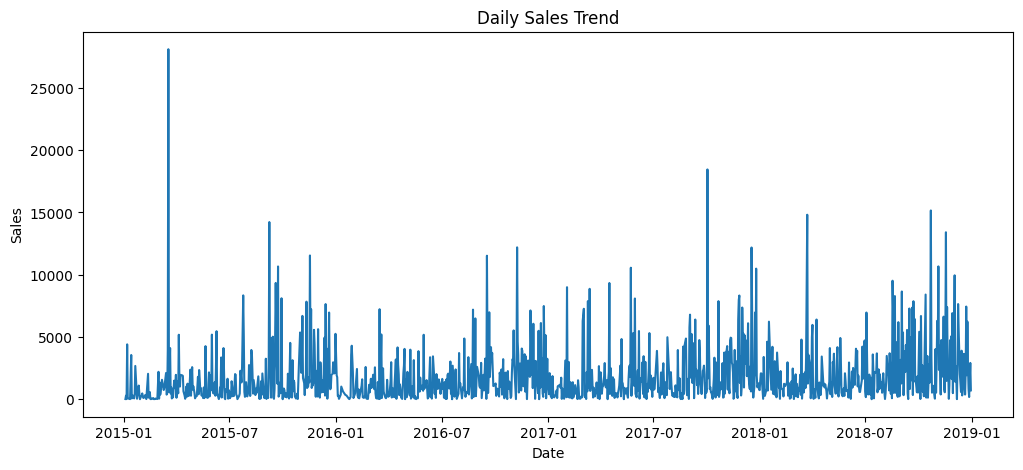

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [10]:
prophet_df = daily_sales.rename(columns={
    'Order Date': 'ds',
    'Sales': 'y'
})

prophet_df.head()

,ds,y
0,2015-01-03,16.448
1,2015-01-04,288.060
2,2015-01-05,19.536
3,2015-01-06,4407.100
4,2015-01-07,87.158


In [11]:
from prophet import Prophet

C:\Users\DELL\AppData\Roaming\Python\Python314\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [12]:
model = Prophet()
model.fit(prophet_df)

21:38:00 - cmdstanpy - INFO - Chain [1] start processing
21:38:01 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-03,1420.012958,-1314.602610,4263.188347,1420.012958,1420.012958,78.486949,78.486949,78.486949,364.268504,364.268504,364.268504,-285.781555,-285.781555,-285.781555,0.0,0.0,0.0,1498.499907
1,2015-01-04,1420.259294,-1438.347509,3835.570023,1420.259294,1420.259294,-256.106385,-256.106385,-256.106385,124.674385,124.674385,124.674385,-380.780770,-380.780770,-380.780770,0.0,0.0,0.0,1164.152909
2,2015-01-05,1420.505629,-1661.784961,3722.027335,1420.505629,1420.505629,-456.498916,-456.498916,-456.498916,13.095998,13.095998,13.095998,-469.594914,-469.594914,-469.594914,0.0,0.0,0.0,964.006713
3,2015-01-06,1420.751964,-1356.996548,4061.130763,1420.751964,1420.751964,-188.381933,-188.381933,-188.381933,362.646838,362.646838,362.646838,-551.028771,-551.028771,-551.028771,0.0,0.0,0.0,1232.370032
4,2015-01-07,1420.998300,-1899.633128,3360.563460,1420.998300,1420.998300,-732.406846,-732.406846,-732.406846,-108.375921,-108.375921,-108.375921,-624.030925,-624.030925,-624.030925,0.0,0.0,0.0,688.591453


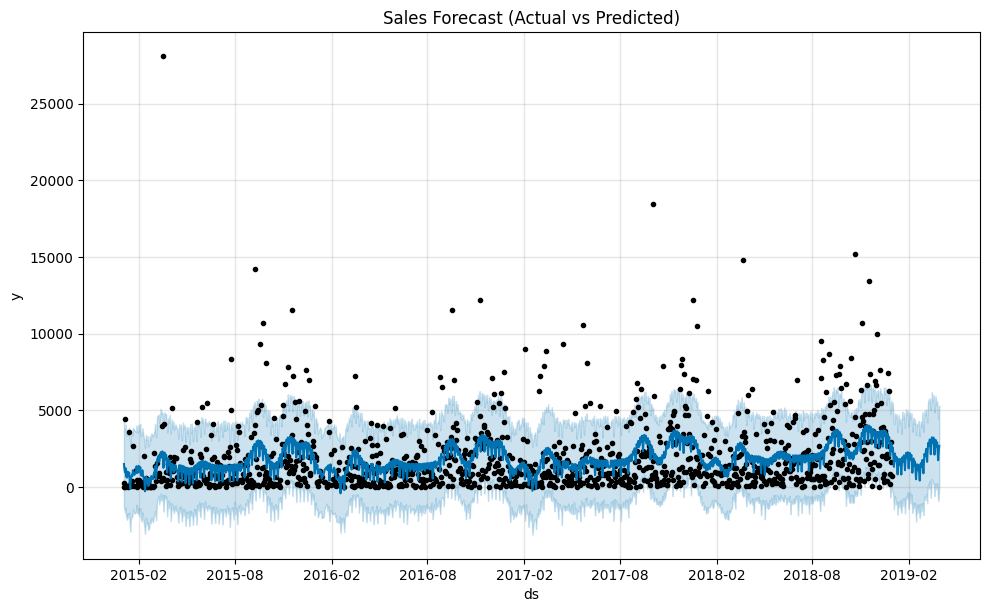

In [14]:
model.plot(forecast)
plt.title("Sales Forecast (Actual vs Predicted)")
plt.show()

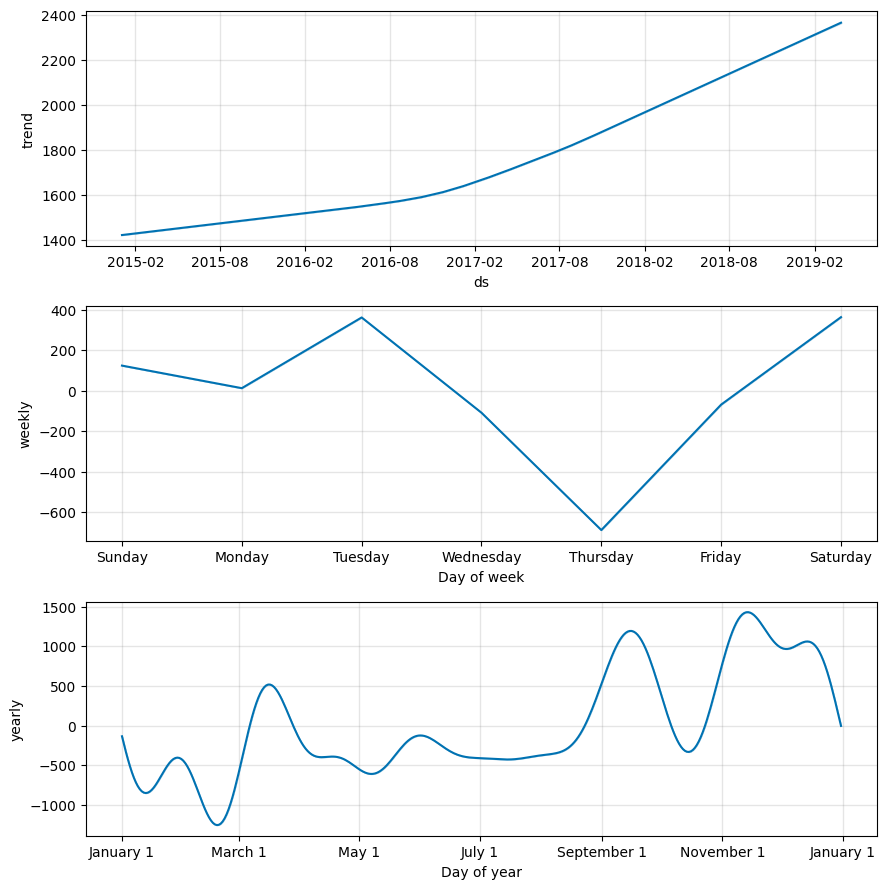

In [15]:
model.plot_components(forecast)
plt.show()

In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(
    "sales_forecast.csv", index=False
)